# Predictive model on Cars Carbon Dioxide Emissions

***

## Project scope

***

The project has been made in the scope of my training at Codecademy.com.

This is final project of the Data Science Career Path. The subject is left up to the trainee.  
I choose a dataset from French Data governments under an open license.  
  
Data: https://www.data.gouv.fr/fr/datasets/emissions-de-co2-et-de-polluants-des-vehicules-commercialises-en-france/  
License: https://www.etalab.gouv.fr/wp-content/uploads/2014/05/Licence_Ouverte.pdf  

This data contains the following informations for all commercialized vehicles in France in 2014:
* fuel consumption
* carbon dioxide (CO2) emissions
* emissions of air pollutants (regulated under the Euro standard)
* all the technical characteristics of the vehicles (ranges, brands, models, CNIT number, type of energy, etc.)

## Objectives

***

The objective is, after an analysis of the dataset, to build a machine learning model in order to predict what could be the CO2 emissions of a new car according to its characteristics. 
In addition, we will also look at the weight of each characteristics in the prediction of CO2 emissions.


## Explore and clean the dataset 

***

### General observation

***

In [1]:
# import the needed libraries for analysis
import pandas as pd

# for a better display of dataframe in Jupyter Notebook
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

# import the data set and display the first rows
cars = pd.read_csv('mars-2014-complete.csv', sep=';')
display(cars.head())

# import the glossary for the columns and display it
glossary = pd.read_excel('carlab-annuaire-variable.xlsx', usecols='A:E')
display(glossary)

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,typ_boite_nb_rapp,conso_urb,conso_exurb,conso_mixte,co2,co_typ_1,hc,nox,hcnox,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,M 6,"11,30000019","5,800000191","7,800000191",182.0,"0,647000015","0,052000001","0,032000002",NaN,"0,002",1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,M 6,"11,5",6,8,186.0,"0,647000015","0,052000001","0,032000002",NaN,"0,002",1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,M 6,"6,599999905","4,199999809","5,099999905",134.0,"0,066",NaN,"0,149000004","0,174999997","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,M 6,"6,599999905","4,199999809","5,099999905",134.0,"0,066",NaN,"0,149000004","0,174999997","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,M 6,"6,900000095","4,300000191","5,300000191",139.0,"0,059999999",NaN,"0,164000005","0,193000004","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN


,nom-colonne,typerubrique,longueur,légende,unité
0,lib_mrq_utac,varchar,12,la marque,NaN
1,lib_mod_doss,varchar,20,le modele du dossier,NaN
2,lib_mod,varchar,20,le modèle commercial,NaN
3,dscom,varchar,91,la désignation commerciale,NaN
4,cnit,varchar,15,le Code National d'Identification du Type (CNIT),NaN
5,tvv,varchar,36,le Type-Variante-Version (TVV) ou le type Mines,NaN
6,cod_cbr,varchar,5,le type de carburant,NaN
7,hybride,varchar,3,une information permettant d’identifier les vé...,NaN
8,puiss_admin_98,varnb,2,la puissance administrative,NaN
9,puiss_max,varnb,11,la puissance maximale (en kW),kW


In [2]:
# display info on the dataset
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55044 entries, 0 to 55043
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            55044 non-null  object 
 1   lib_mod_doss       55044 non-null  object 
 2   lib_mod            55044 non-null  object 
 3   dscom              55044 non-null  object 
 4   cnit               55044 non-null  object 
 5   tvv                55044 non-null  object 
 6   cod_cbr            55044 non-null  object 
 7   hybride            55044 non-null  object 
 8   puiss_admin_98     55044 non-null  int64  
 9   puiss_max          55044 non-null  object 
 10  typ_boite_nb_rapp  55044 non-null  object 
 11  conso_urb          55001 non-null  object 
 12  conso_exurb        55001 non-null  object 
 13  conso_mixte        55010 non-null  object 
 14  co2                55010 non-null  float64
 15  co_typ_1           54886 non-null  object 
 16  hc                 977

We already see that the last 4 columns needs to be removed.  
We also see that some features has null values that we will remove later and some numerical values are stored as strings (for instance 'puiss_max' column.)

But first let's remove the last 4 columns that are full of Null values.

In [3]:
# remove last 4 columns
cars.drop(labels=['Unnamed: 27', 'Unnamed: 26', 'Unnamed: 28', 'Unnamed: 29'], axis=1, inplace=True)

# check the modification
display(cars.head(2))

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,typ_boite_nb_rapp,conso_urb,conso_exurb,conso_mixte,co2,co_typ_1,hc,nox,hcnox,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,M 6,"11,30000019","5,800000191","7,800000191",182.0,"0,647000015","0,052000001","0,032000002",NaN,"0,002",1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,M 6,"11,5",6,8,186.0,"0,647000015","0,052000001","0,032000002",NaN,"0,002",1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER


### Observations of the features

***

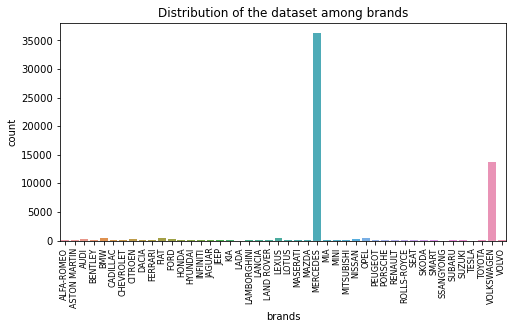

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the distribution of samples among brands
fig = plt.figure(figsize=(8, 4))
sns.countplot(data=cars, x=cars.lib_mrq)
plt.xticks(rotation=90, size=8)
plt.xlabel('brands')
plt.title('Distribution of the dataset among brands')
plt.show()

We can clearly see that MERCEDES and VOLKSWAGEN are over represented.
Let's zoom on MERCEDES to better understand.

In [5]:
# display type of cars represented for Mercedes
print('Distribution within MERCEDES samples')
print(cars.Carrosserie[cars.lib_mrq == 'MERCEDES'].value_counts())
print('\n')

# display unique MERCEDES commercial model and cnit id codes
print('# of unique commercial model: {}'.format(cars.dscom[cars.lib_mrq == 'MERCEDES'].nunique()))
print('# of unique cnit ids: {}'.format(cars.cnit[cars.lib_mrq == 'MERCEDES'].nunique()))

Distribution within MERCEDES samples
MINIBUS                32076
BERLINE                 2154
BREAK                    685
COUPE                    443
TS TERRAINS/CHEMINS      402
CABRIOLET                268
MONOSPACE COMPACT        180
COMBISPACE                12
Name: Carrosserie, dtype: int64


# of unique commercial model: 305
# of unique cnit ids: 36208


It appears that MERCEDES registered a lot of different versions for what it seems similar models.  
They probably have the same characteristics and then duplicated rows.

In [6]:
# remove identifical columns
cars.drop(labels=['cnit', 'tvv'], axis=1, inplace=True)

# count duplicated rows
print('Is a duplicated row?')
print(cars.duplicated().value_counts())

Is a duplicated row?
True     46406
False     8638
dtype: int64


As expected, we find duplicated rows, and apparently Mercedes was not a isolated case, so let's remove the duplicates.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8638 entries, 0 to 55043
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            8638 non-null   object 
 1   lib_mod_doss       8638 non-null   object 
 2   lib_mod            8638 non-null   object 
 3   dscom              8638 non-null   object 
 4   cod_cbr            8638 non-null   object 
 5   hybride            8638 non-null   object 
 6   puiss_admin_98     8638 non-null   int64  
 7   puiss_max          8638 non-null   object 
 8   typ_boite_nb_rapp  8638 non-null   object 
 9   conso_urb          8604 non-null   object 
 10  conso_exurb        8604 non-null   object 
 11  conso_mixte        8613 non-null   object 
 12  co2                8613 non-null   float64
 13  co_typ_1           8533 non-null   object 
 14  hc                 3485 non-null   object 
 15  nox                8533 non-null   object 
 16  hcnox              5078

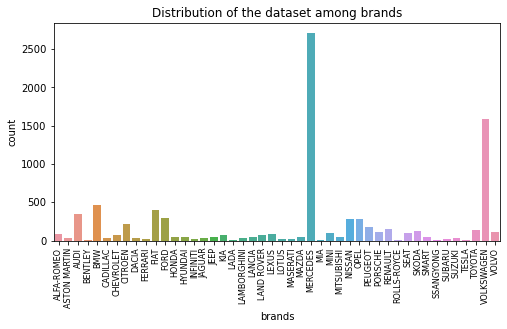

In [7]:
# remove duplicates
cars.drop_duplicates(inplace=True)

# check the new dataset
print(cars.info())

# plot again the distribution of samples among brands
fig = plt.figure(figsize=(8, 4))
sns.countplot(data=cars, x=cars.lib_mrq)
plt.xticks(rotation=90, size=8)
plt.xlabel('brands')
plt.title('Distribution of the dataset among brands')
plt.show()

Then, we have a more homogeneous distribution even if there is bigger representation of Mercedes and Volkswagen.

### Convert strings as float

***

In [8]:
# convert string columns in floats
col_to_convert = ['puiss_max', 'conso_urb', 'conso_exurb', 'conso_mixte']
for col in col_to_convert:
    cars[col] = cars[col].str.replace(',', '.').astype('float')

# check
print(cars[col_to_convert].head())
print('\n')
print(cars[col_to_convert].info())

   puiss_max  conso_urb  conso_exurb  conso_mixte
0      147.0       11.3          5.8          7.8
1      147.0       11.5          6.0          8.0
2      100.0        6.6          4.2          5.1
4      125.0        6.9          4.3          5.3
6      125.0        6.6          4.3          5.1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8638 entries, 0 to 55043
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   puiss_max    8638 non-null   float64
 1   conso_urb    8604 non-null   float64
 2   conso_exurb  8604 non-null   float64
 3   conso_mixte  8613 non-null   float64
dtypes: float64(4)
memory usage: 595.5 KB
None


### Remove unwanted columns and NaN values

***

We are going to focus on CO2 emissions on this analysis. We can then remove other measurements

In [9]:
# remove other measurments + date columns
col_to_remove = ['co_typ_1', 'hc', 'nox', 'hcnox', 'ptcl', 'date_maj']
cars.drop(labels=col_to_remove, axis=1, inplace=True)

In [10]:
#remove NaN
cars.dropna(inplace=True)

# check
display(cars.head(2))
print(cars.info())

,lib_mrq,lib_mod_doss,lib_mod,dscom,cod_cbr,hybride,puiss_admin_98,puiss_max,typ_boite_nb_rapp,conso_urb,conso_exurb,conso_mixte,co2,masse_ordma_min,masse_ordma_max,champ_v9,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),ES,non,12,147.0,M 6,11.3,5.8,7.8,182.0,1505,1505,715/2007*692/2008EURO5,BERLINE,MOY-SUPER
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),ES,non,12,147.0,M 6,11.5,6.0,8.0,186.0,1555,1555,715/2007*692/2008EURO5,BERLINE,MOY-SUPER


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8596 entries, 0 to 55043
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            8596 non-null   object 
 1   lib_mod_doss       8596 non-null   object 
 2   lib_mod            8596 non-null   object 
 3   dscom              8596 non-null   object 
 4   cod_cbr            8596 non-null   object 
 5   hybride            8596 non-null   object 
 6   puiss_admin_98     8596 non-null   int64  
 7   puiss_max          8596 non-null   float64
 8   typ_boite_nb_rapp  8596 non-null   object 
 9   conso_urb          8596 non-null   float64
 10  conso_exurb        8596 non-null   float64
 11  conso_mixte        8596 non-null   float64
 12  co2                8596 non-null   float64
 13  masse_ordma_min    8596 non-null   int64  
 14  masse_ordma_max    8596 non-null   int64  
 15  champ_v9           8596 non-null   object 
 16  Carrosserie        8596

The dataset is now ready to be analyzed. There are 8596 rows of non null samples.

## Analyze the data

***

### Numerical features

***

First let's have a look to the value we want to predict: 'co2'.

count    8596.000000
mean      176.013378
std        49.883076
min        48.000000
25%       135.000000
50%       181.000000
75%       209.000000
max       572.000000
Name: co2, dtype: float64


Here is the car with the lowest CO2 emissions in our dataset:


,lib_mrq,lib_mod_doss,lib_mod,dscom,cod_cbr,hybride,puiss_admin_98,puiss_max,typ_boite_nb_rapp,conso_urb,conso_exurb,conso_mixte,co2,masse_ordma_min,masse_ordma_max,champ_v9,Carrosserie,gamme
55014,VOLVO,V60 HYBRID,V60,V60 PLUG-IN HYBRID D6 Geartronic 6 AWD,GL,oui,10,158.0,A 6,0.0,5.5,1.8,48.0,1949,1949,715/2007*459/2012EURO5,BREAK,SUPERIEURE




Here is the car with the highest CO2 emissions in our dataset:


,lib_mrq,lib_mod_doss,lib_mod,dscom,cod_cbr,hybride,puiss_admin_98,puiss_max,typ_boite_nb_rapp,conso_urb,conso_exurb,conso_mixte,co2,masse_ordma_min,masse_ordma_max,champ_v9,Carrosserie,gamme
197,ASTON MARTIN,ONE-77,ONE-77,ONE-77,ES,non,81,559.299988,A 6,41.099998,14.9,24.5,572.0,1815,1815,715/2007*692/2008EURO5,COUPE,LUXE


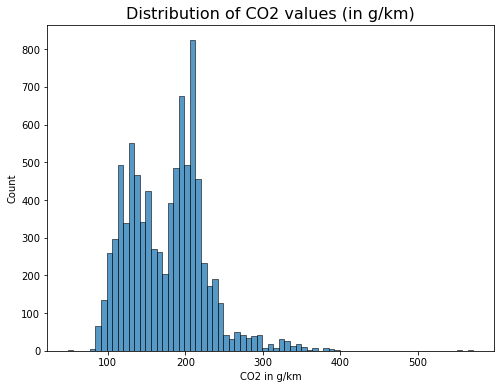

In [11]:
# plot histogram of co2
plt.figure(figsize=(8, 6))
sns.histplot(data=cars, x='co2')
plt.xlabel('CO2 in g/km')
plt.title('Distribution of CO2 values (in g/km)', size=16)

# overall description of co2
print(cars.co2.describe())

# print the min and max CO2 emission cars in our dataset
print('\n')
print('Here is the car with the lowest CO2 emissions in our dataset:')
display(cars[cars.co2 == min(cars.co2)])
print('\n')
print('Here is the car with the highest CO2 emissions in our dataset:')
display(cars[cars.co2 == max(cars.co2)])
print('\n')


This is a bimodal distribution.  
It seems that we have 2 groups of vehicles, one around 140 g/km and one around 200 g/km.  
We can see as well that we have some outliers.

We can now have a look on how our value CO2 is correlated to the features by ploting a heatmap.

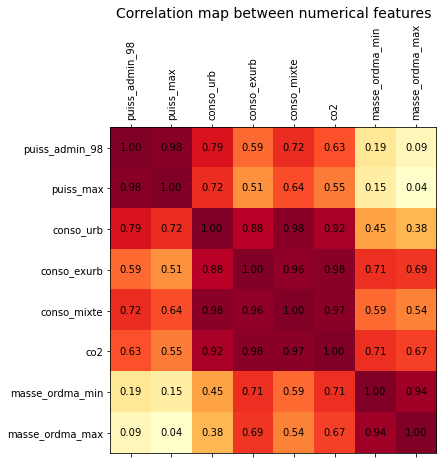

In [12]:
# import numpy 
import numpy as np

# plot the correlation map
fig, ax = plt.subplots(figsize=(8, 6))
ax.matshow(cars.corr(), cmap=plt.cm.YlOrRd)

# display the correlation factors on the plot
for (x, y), value in np.ndenumerate(cars.corr()):
    plt.text(x, y, f"{value:.2f}", va="center", ha="center")

# set ticks and title
ax.set_xticks(range(0, len(cars.corr())))
ax.set_xticklabels(cars.corr().columns, rotation=90)
ax.set_yticks(range(0, len(cars.corr())))
ax.set_yticklabels(cars.corr().columns)
plt.title('Correlation map between numerical features', size=14)

plt.show()

First, if we look at CO2, we can see that we have overall relatively good correlation with all the features, which is a good thing for our predictive model.  

Secondly, we can see that some features are highly correlated.   

For example:
* masse_ordma_min and masse_ordma_max have a correlated factor of 0.94
* puiss_admin_98 and puiss_max have a correlated factor of 0.98
* conso_mixte has a correlated factor of 0.98 an 0.96 with respectively conso_urb and conso_exurb

Actually, it makes sense when we look at the description of the features.  
With this level of correlation, we are then able to remove some of them for better readibility.

In [13]:
# remove columns with high correlation between other features
col_high_corr_to_remove = ['masse_ordma_max', 'puiss_max', 'conso_mixte']
cars.drop(labels=col_high_corr_to_remove, axis=1, inplace=True)

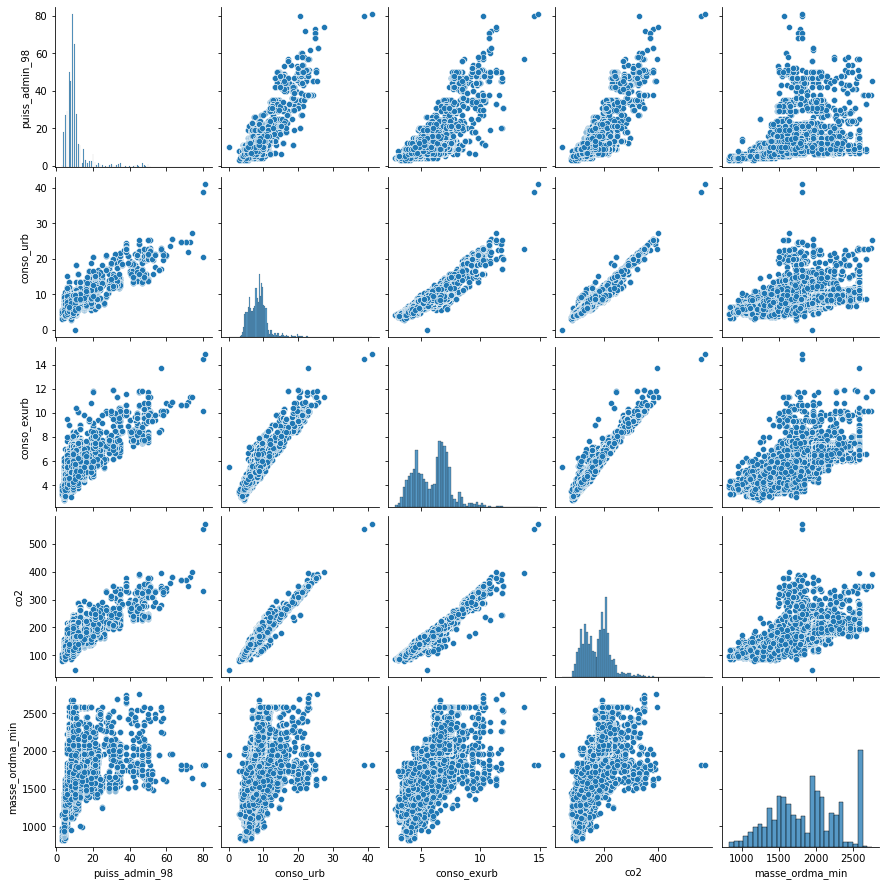

In [14]:
# plot a pairplot to have an overview of all the numerical features
sns.pairplot(cars)
plt.show()

As on the correlation map, we can see that CO2 has good correlation with our features by looking at the plots.  
We also distinguish bimodal distribution on the following features: masse_ordma_min, conso_exurb and slighly on conso_urb.

Now that we have a good understanding of our numerical features, let's have a look to the categorical ones.

### Categorical features

***

First, let's have a look if the 'Carrosserie' has an impact on the emissions of C02.

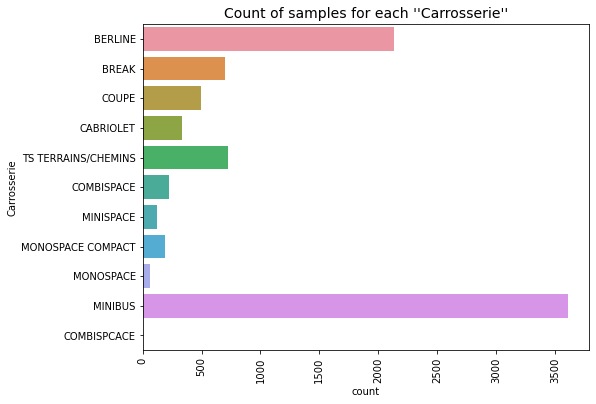

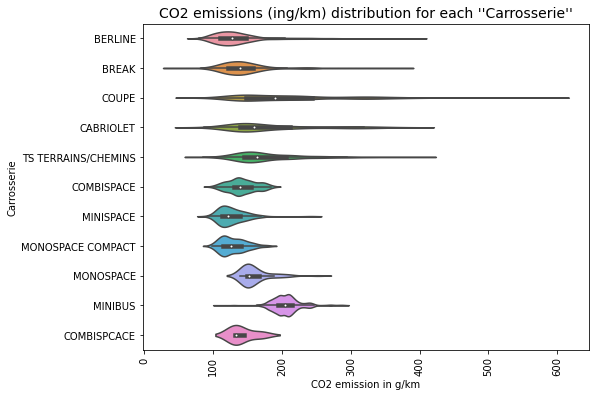

In [15]:
# plot count for each Carrosserie in our dataset
plt.figure(figsize=(8,6))
sns.countplot(data=cars, y='Carrosserie')
plt.xticks(rotation=90)
plt.title('Count of samples for each \'\'Carrosserie\'\'', size=14)
plt.show()


# plot count for each Carrosserie in our dataset
plt.figure(figsize=(8,6))
sns.violinplot(data=cars, y='Carrosserie', x='co2')
plt.title('CO2 emissions (ing/km) distribution for each \'\'Carrosserie\'\'', size=14)
plt.xlabel('CO2 emission in g/km')
plt.xticks(rotation=90)
plt.show()

Regarding the count, we can see that MINIBUS and BERLINE are over represented in our dataset.   
On the opposite some categories are underrepresented such as COMBISPACE.

On the second plot, we can clearly see that the carrosserie does have an impact on the CO2 emission.  
MINIBUS category has the highest emission with an average arounf 200 g/km whereas with a BERLINE we are around average at 140 g/km (but with some outliers up to 400g/km).

Hard to conclude on some categories for which we don't have a lot of samples (for example COMBISPACE).

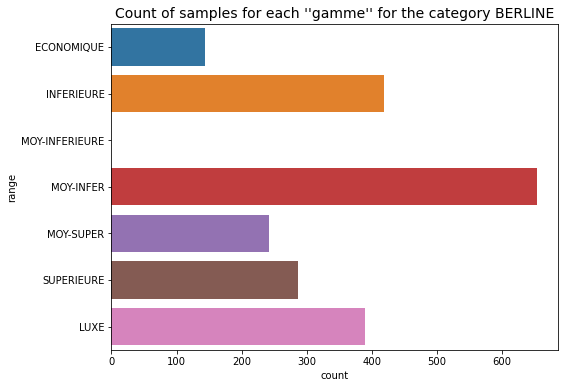

In [16]:
# lets have a look on the 'gamme' (range) for a given 'carrosserie'
plt.figure(figsize=(8, 6))
sns.countplot(data=cars[cars.Carrosserie == 'BERLINE'], y='gamme', order=['ECONOMIQUE', 'INFERIEURE', 'MOY-INFERIEURE', 'MOY-INFER', 'MOY-SUPER', 'SUPERIEURE', 'LUXE'])
plt.title('Count of samples for each \'\'gamme\'\' for the category BERLINE', size=14)
plt.ylabel('range')
plt.show()

MOY-INFER and  MOY-INFERIEURE are the same, let's merge them.  
All the range categories are well represented in BERLINE, so we can easily compare them regarding to CO2 emission.

In [17]:
# MOY-INFER and  MOY-INFERIEURE are the same, let's merge them
cars['gamme'] = cars['gamme'].str.replace('MOY-INFERIEURE', 'MOY-INFER')

# check
print(cars['gamme'].unique())

['MOY-SUPER' 'LUXE' 'MOY-INFER' 'INFERIEURE' 'SUPERIEURE' 'ECONOMIQUE']


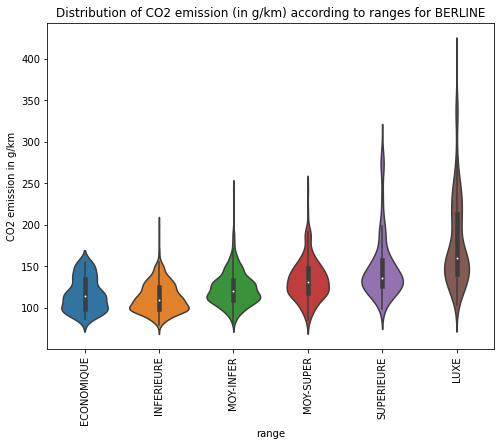

In [18]:
# plot co2 distribution in function of 'gamme' (range)
plt.figure(figsize=(8,6))
sns.violinplot(data=cars[cars.Carrosserie == 'BERLINE'], x='gamme', y='co2', order=['ECONOMIQUE', 'INFERIEURE', 'MOY-INFER', 'MOY-SUPER', 'SUPERIEURE', 'LUXE'])
plt.xticks(rotation=90)
plt.title('Distribution of CO2 emission (in g/km) according to ranges for BERLINE')
plt.xlabel('range')
plt.ylabel('CO2 emission in g/km')
plt.show()

We can see that, for a given category (here BERLINE) the CO2 emission increases when range increase.  
LUXE category has an average of 150g/km and ECONOMIQUE and INFERIEURE around 115g/km.  
LUXE has also a really wide distribution with outliers up to 400 g/km of CO2.

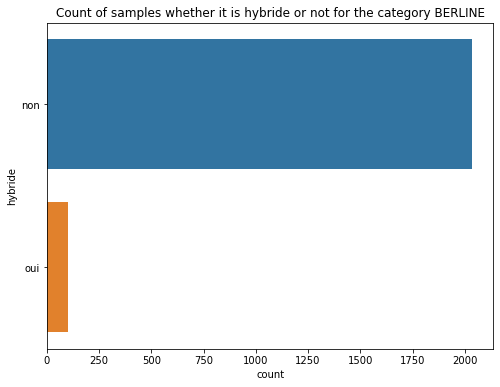

In [19]:
# look at the 'hybride' feature for BERLINE
plt.figure(figsize=(8, 6))
sns.countplot(data=cars[cars.Carrosserie == 'BERLINE'], y='hybride')
plt.title('Count of samples whether it is hybride or not for the category BERLINE', size=12)
plt.show()

Not so many BERLINE hybride in our dataset.

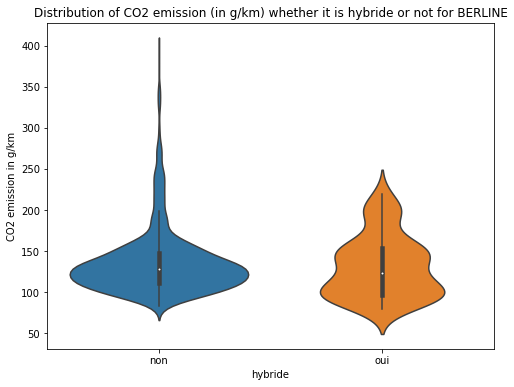

In [20]:
# plot co2 distribution whether it is hybride or not for BERLINE (range)
plt.figure(figsize=(8,6))
sns.violinplot(data=cars[cars.Carrosserie == 'BERLINE'], x='hybride', y='co2')
plt.title('Distribution of CO2 emission (in g/km) whether it is hybride or not for BERLINE')
plt.ylabel('CO2 emission in g/km')
plt.show()

It looks the average of CO2 emission is similar whether or not it is hybride for BERLINE, but do not draw conclusion so fast as we don't have so many samples of hybride cars in comparison to non-hybride.

That is all for the analysis. Now let's build our predictive model.

## Build the predictive model

***

### Data preprocessing

***

#### Categorical values

***

The only feature that has a specific order/weight is 'gamme', we will use a label encoder for this one.   
For the others, we will use one-hot encoding: the simplest one is using pandas' .get_dummies() method.

In [21]:
# use LabelEncoder on 'gamme' (range)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cars['gamme_enc'] = encoder.fit_transform(cars.gamme)

# look at the encoding
mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print('Encoding :', mapping)

# remove 'gamme' column
cars.drop(labels=['gamme'], axis=1, inplace=True)

Encoding : {'ECONOMIQUE': 0, 'INFERIEURE': 1, 'LUXE': 2, 'MOY-INFER': 3, 'MOY-SUPER': 4, 'SUPERIEURE': 5}


In [22]:
# one-hot encoding
# select features to encode
features = ['lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom', 'cod_cbr', 'hybride', 'typ_boite_nb_rapp', 'champ_v9', 'Carrosserie']

# use get_dummies to convert string categories into integers
for feature in features:
    cars = pd.get_dummies(cars, columns=[feature], prefix = [feature])
    
# check
display(cars.head())

,puiss_admin_98,conso_urb,conso_exurb,co2,masse_ordma_min,gamme_enc,lib_mrq_ALFA-ROMEO,lib_mrq_ASTON MARTIN,lib_mrq_AUDI,lib_mrq_BENTLEY,lib_mrq_BMW,lib_mrq_CADILLAC,lib_mrq_CHEVROLET,lib_mrq_CITROEN,lib_mrq_DACIA,lib_mrq_FERRARI,lib_mrq_FIAT,lib_mrq_FORD,lib_mrq_HONDA,lib_mrq_HYUNDAI,lib_mrq_INFINITI,lib_mrq_JAGUAR,lib_mrq_JEEP,lib_mrq_KIA,lib_mrq_LADA,lib_mrq_LAMBORGHINI,lib_mrq_LANCIA,lib_mrq_LAND ROVER,lib_mrq_LEXUS,lib_mrq_LOTUS,lib_mrq_MASERATI,lib_mrq_MAZDA,lib_mrq_MERCEDES,lib_mrq_MINI,lib_mrq_MITSUBISHI,lib_mrq_NISSAN,lib_mrq_OPEL,lib_mrq_PEUGEOT,lib_mrq_PORSCHE,lib_mrq_RENAULT,lib_mrq_ROLLS-ROYCE,lib_mrq_SEAT,lib_mrq_SKODA,lib_mrq_SMART,lib_mrq_SSANGYONG,lib_mrq_SUBARU,lib_mrq_SUZUKI,lib_mrq_TOYOTA,lib_mrq_VOLKSWAGEN,lib_mrq_VOLVO,lib_mod_doss_107,lib_mod_doss_159,lib_mod_doss_2008,lib_mod_doss_207,lib_mod_doss_208,lib_mod_doss_2171,lib_mod_doss_2172,lib_mod_doss_3008,lib_mod_doss_308,lib_mod_doss_370Z,lib_mod_doss_370Z ROADSTER,lib_mod_doss_4008,lib_mod_doss_458,lib_mod_doss_4C,lib_mod_doss_4X4,lib_mod_doss_500,lib_mod_doss_500 ABARTH,lib_mod_doss_5008,lib_mod_doss_500C,lib_mod_doss_500C ABARTH,lib_mod_doss_500L,lib_mod_doss_508,lib_mod_doss_807,lib_mod_doss_86,lib_mod_doss_911,lib_mod_doss_911 TURBO,lib_mod_doss_911 TURBO S,lib_mod_doss_A1,lib_mod_doss_A1 QUATTRO,lib_mod_doss_A1 SPORTBACK,lib_mod_doss_A3,lib_mod_doss_A3 CABRIOLET,lib_mod_doss_A3 LIMOUSINE,lib_mod_doss_A3 SPORTBACK,lib_mod_doss_A4 ALLROAD QUATTRO,lib_mod_doss_A4 AVANT,lib_mod_doss_A4 LIMOUSINE,lib_mod_doss_A5 CABRIOLET,lib_mod_doss_A5 COUPE,lib_mod_doss_A5 SPORTBACK,lib_mod_doss_A6 ALLROAD QUATTRO,lib_mod_doss_A6 AVANT,lib_mod_doss_A6 LIMOUSINE,lib_mod_doss_A6 LIMOUSINE HYBRID,lib_mod_doss_A7 SPORTBACK,lib_mod_doss_A8,lib_mod_doss_A8L,lib_mod_doss_ACCORD,lib_mod_doss_ADAM,lib_mod_doss_AGILA,lib_mod_doss_ALHAMBRA,lib_mod_doss_ALTEA,lib_mod_doss_ALTEA 4 FREETRACK,lib_mod_doss_ALTEA XL,lib_mod_doss_ALTO,lib_mod_doss_ANTARA,lib_mod_doss_AR8C SPIDER,lib_mod_doss_ASTRA,lib_mod_doss_ASTRA GTC,lib_mod_doss_ASTRA SPORTS TOURER,lib_mod_doss_ASX,lib_mod_doss_ATS,lib_mod_doss_AUDI HYBRID,lib_mod_doss_AURIS,lib_mod_doss_AVENSIS,lib_mod_doss_AVENTADOR,lib_mod_doss_AVEO,lib_mod_doss_AYGO,lib_mod_doss_B-MAX,lib_mod_doss_BEETLE,lib_mod_doss_BERLINGO,lib_mod_doss_BIPPER,lib_mod_doss_BIPPER TREK,lib_mod_doss_BOXER,lib_mod_doss_BOXER 4X4,lib_mod_doss_BOXSTER,lib_mod_doss_BOXSTER S,lib_mod_doss_BRAVO,lib_mod_doss_BRERA,lib_mod_doss_BRZ,lib_mod_doss_C-MAX,lib_mod_doss_C1,lib_mod_doss_C3,lib_mod_doss_C3 PICASSO,lib_mod_doss_C4,lib_mod_doss_C4 AIRCROSS,lib_mod_doss_C4 PICASSO,lib_mod_doss_C5,lib_mod_doss_C8,lib_mod_doss_CADDY,lib_mod_doss_CALIFORNIA,lib_mod_doss_CALIFORNIA BEACH,lib_mod_doss_CAMARO,lib_mod_doss_CAPTIVA,lib_mod_doss_CAPTUR,lib_mod_doss_CARAVELLE,lib_mod_doss_CARENS,lib_mod_doss_CASCADA,lib_mod_doss_CAYENNE,lib_mod_doss_CAYENNE DIESEL,lib_mod_doss_CAYENNE GTS,lib_mod_doss_CAYENNE S,lib_mod_doss_CAYENNE S DIESEL,lib_mod_doss_CAYENNE S HYBRID,lib_mod_doss_CAYENNE TURBO,lib_mod_doss_CAYMAN,lib_mod_doss_CAYMAN S,lib_mod_doss_CC,lib_mod_doss_CEE'D,lib_mod_doss_CITAN,lib_mod_doss_CITIGO,lib_mod_doss_CIVIC,lib_mod_doss_CLASSE A,lib_mod_doss_CLASSE B,lib_mod_doss_CLASSE C,lib_mod_doss_CLASSE CL,lib_mod_doss_CLASSE CLA,lib_mod_doss_CLASSE CLS,lib_mod_doss_CLASSE E,lib_mod_doss_CLASSE G,lib_mod_doss_CLASSE GL,lib_mod_doss_CLASSE GLA,lib_mod_doss_CLASSE GLK,lib_mod_doss_CLASSE M,lib_mod_doss_CLASSE R,lib_mod_doss_CLASSE S,lib_mod_doss_CLASSE SL,lib_mod_doss_CLASSE SLK,lib_mod_doss_CLIO,lib_mod_doss_COLT,lib_mod_doss_COMBO,lib_mod_doss_COMPASS,lib_mod_doss_CONTINENTAL GT,lib_mod_doss_CONTINENTAL GT SPEED,lib_mod_doss_CONTINENTAL GT V8,lib_mod_doss_CONTINENTAL GT V8 S,lib_mod_doss_CONTINENTAL GTC,lib_mod_doss_CONTINENTAL GTC V8,lib_mod_doss_CORSA,lib_mod_doss_CORVETTE,lib_mod_doss_CORVETTE Z06,lib_mod_doss_CORVETTE ZR1,lib_mod_doss_CR-V,lib_mod_doss_CR-Z,lib_mod_doss_CRAFTER,lib_mod_doss_CRUZE,lib_mod_doss_CT200H,lib_mod_doss_CTS,lib_mod_doss_CTS-V,lib_mod_doss_CYGNET,li

We end up with a dataset only with numerical values, but we increases a lot the number of features (now 4826).  
It's a lot and could slow our calculation. Let's see if we can remove some. 

To remove the non useful column for our model, we can use VarianceThreshold to remove feature with zero and near zero variance.

In [23]:
# define train and test sets
X = cars.drop(labels=['co2'], axis=1)
y = cars.co2

In [24]:
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold=0.2):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

X = variance_threshold_selector(X, threshold=0.1)
display(X)

,puiss_admin_98,conso_urb,conso_exurb,masse_ordma_min,gamme_enc,lib_mrq_MERCEDES,lib_mrq_VOLKSWAGEN,lib_mod_doss_CRAFTER,lib_mod_doss_SPRINTER,lib_mod_CRAFTER,lib_mod_SPRINTER,cod_cbr_ES,cod_cbr_GO,typ_boite_nb_rapp_A 7,typ_boite_nb_rapp_M 6,"champ_v9_""715/2007*195/2013EURO5","champ_v9_""715/2007*630/2012EURO5",Carrosserie_BERLINE,Carrosserie_MINIBUS
0,12,11.3,5.8,1505,4,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,12,11.5,6.0,1555,4,0,0,0,0,0,0,1,0,0,1,0,0,1,0
2,7,6.6,4.2,1565,4,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4,9,6.9,4.3,1565,4,0,0,0,0,0,0,0,1,0,1,0,0,1,0
6,9,6.6,4.3,1565,4,0,0,0,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55039,10,5.6,4.5,1755,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0
55040,11,8.6,5.2,1799,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0
55041,13,8.6,5.2,1798,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0
55042,12,6.1,4.8,1788,5,0,0,0,0,0,0,0,1,0,1,0,0,0,0


We have now 19 columns, which looks reasonnable and the columns that we have removed are mostly dummies.

## Prepare the train and test datasets

***

In [25]:
# import function to build train and test sets
from sklearn.model_selection import train_test_split 

# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Create the model

***


In [26]:
# import the model
from sklearn.linear_model import LinearRegression

# train the model
model = LinearRegression()
model.fit(X_train, y_train)

# print the score on test and train sets
print('{}'.format(model.__class__.__name__))
print('Train R^2: {:.4f}'.format(model.score(X_train, y_train)))
print('Test R^2: {:.4f}'.format(model.score(X_test, y_test)))

LinearRegression
Train R^2: 0.9920
Test R^2: 0.9925


The R^2 is very good with the Multiple Linear Regression model.
Let's have a look of the important features of our model.

In [27]:
#get the coef for each feature
coef_df = pd.DataFrame(data={'Features': X_train.columns, 'Coef': model.coef_})
coef_df = coef_df.sort_values(by=['Coef'], ascending=False)
display(coef_df)

,Features,Coef
12,cod_cbr_GO,27.592397
2,conso_exurb,16.600024
11,cod_cbr_ES,13.321544
1,conso_urb,7.300662
18,Carrosserie_MINIBUS,4.885800
10,lib_mod_SPRINTER,0.993688
8,lib_mod_doss_SPRINTER,0.993688
5,lib_mrq_MERCEDES,0.680441
0,puiss_admin_98,0.179308
6,lib_mrq_VOLKSWAGEN,0.099473


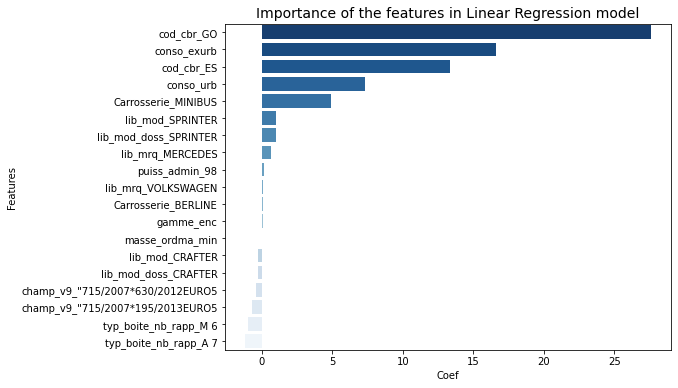

In [28]:
# plot the coefs for each feature
plt.figure(figsize=(8,6))
sns.barplot(data=coef_df, y='Features', x='Coef', palette="Blues_r")
plt.title('Importance of the features in Linear Regression model', size=14)
plt.show()

# Conclusions

***

After cleaning, analyzing this public dataset, we have tried to apply a Linear Regression model to predict the CO2 emissions of  commercialized vehicles in France in 2014.

During analysis, we have seen that within a given 'Carrosserie', the CO2 emission increases with the quality range.  
We were also surprised that hybrid vehicles emissions were similar to non hybrid. But datas on hybride cars were limited in comparison to non hybride to draw absolute conclusion.

The model used looks to perform goodly with a good **R^2 score of 0.9925**.  
In the scope of this training, we haven't learned about other metrics to evaluate Linear Regression.

The most important predictors (including dummies) that have been found are the following:
* cod_cbr_GO: whether if the fuel type is GO (gazole)
* conso_exurb: extra city consumption
* cod_cbr_ES: whether if the fuel type is ES (unleaded petrol 95)
* conso_urb: city consumption
* Carrosserie_MINIBUS: whether if it is a MINIBUS or not

Perhaps, better prediction models that are not in our study's scope could be used on this dataset.  
We could also have a look to other emission measurements of the data, such as HC, NOX.   
That is something we may investigate further.

## Extra: compare with other models

***

### Multi Layer Perceptron

***

In [29]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  

# fit train set
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  

# apply same transformation to test data
X_test = scaler.transform(X_test)

# import the model
from sklearn.neural_network import MLPRegressor

# train the model
model = MLPRegressor(random_state=1)
model.fit(X_train, y_train)

# print the score on test and train sets
print('{}'.format(model.__class__.__name__))
print('Train R^2: {:.4f}'.format(model.score(X_train, y_train)))
print('Test R^2: {:.4f}'.format(model.score(X_test, y_test)))

MLPRegressor
Train R^2: 0.9967
Test R^2: 0.9961


C:\Users\josse\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Results are better than Linear Regression. 
Let's try to optimize parameters to improve the model

In [30]:
# increase maximum iterations to avoid non convergence

# train the model
model = MLPRegressor(random_state=1, max_iter=1000)
model.fit(X_train, y_train)

# print the score on test and train sets
print('{}'.format(model.__class__.__name__))
print('Train R^2: {:.4f}'.format(model.score(X_train, y_train)))
print('Test R^2: {:.4f}'.format(model.score(X_test, y_test)))

MLPRegressor
Train R^2: 0.9985
Test R^2: 0.9980


Now our model converges and results are better.

In [31]:
# add a hidden layer

# train the model
model = MLPRegressor(random_state=1, max_iter=1000, hidden_layer_sizes=[100, 100])
model.fit(X_train, y_train)

# print the score on test and train sets
print('{}'.format(model.__class__.__name__))
print('Train R^2: {:.4f}'.format(model.score(X_train, y_train)))
print('Test R^2: {:.4f}'.format(model.score(X_test, y_test)))

MLPRegressor
Train R^2: 0.9986
Test R^2: 0.9979


In [32]:
# add stronger regularization of the weights

# train the model
model = MLPRegressor(random_state=1, max_iter=1000, hidden_layer_sizes=[100, 100], alpha=1)
model.fit(X_train, y_train)

# print the score on test and train sets
print('{}'.format(model.__class__.__name__))
print('Train R^2: {:.4f}'.format(model.score(X_train, y_train)))
print('Test R^2: {:.4f}'.format(model.score(X_test, y_test)))

MLPRegressor
Train R^2: 0.9985
Test R^2: 0.9979


Changing alpha and the number of layer don't help to get better results.
So we are going to choose the following parameters.

MLPRegressor
Train R^2: 0.9985
Test R^2: 0.9980


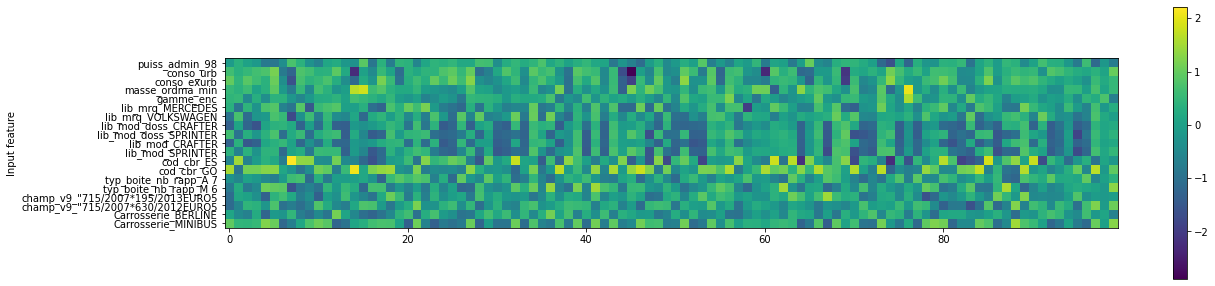

In [33]:
# increase maximum iterations to avoid non convergence

# train the model
model = MLPRegressor(random_state=1, max_iter=1000)
model.fit(X_train, y_train)

# print the score on test and train sets
print('{}'.format(model.__class__.__name__))
print('Train R^2: {:.4f}'.format(model.score(X_train, y_train)))
print('Test R^2: {:.4f}'.format(model.score(X_test, y_test)))

# heatmap of the layer weights
plt.figure(figsize=(20, 5))
plt.imshow(model.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(len(X.columns)), X.columns)
plt.ylabel('Weights')
plt.ylabel('Input feature')
plt.colorbar()
plt.show()

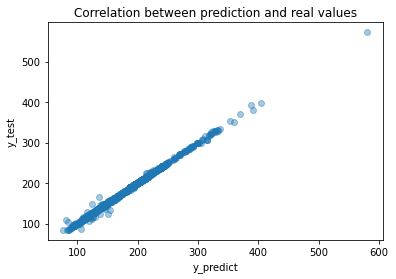

In [34]:
y_predict = model.predict(X_test)

plt.scatter(y_predict, y_test, alpha=0.4)
plt.title('Correlation between prediction and real values')
plt.xlabel('y_predict')
plt.ylabel('y_test')
plt.show()

Features that have small weights for all the hidden units could be considered "less important" for the model, such as "mass_ordma_min", "gamme_enc".  
On the opposite, "cod_cbr_ES", "lib_mod_SPRINTER" sounds to be more important on prediction.  
Visibility of the weights is not as good as Linear Regression and also harder to interpret.

### K Neighbors Regressor

***

In [35]:
# import the model
from sklearn.neighbors import KNeighborsRegressor

# train the model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# print the score on test and train sets
print('{}'.format(model.__class__.__name__))
print('Train R^2: {:.4f}'.format(model.score(X_train, y_train)))
print('Test R^2: {:.4f}'.format(model.score(X_test, y_test)))

KNeighborsRegressor
Train R^2: 0.9893
Test R^2: 0.9779


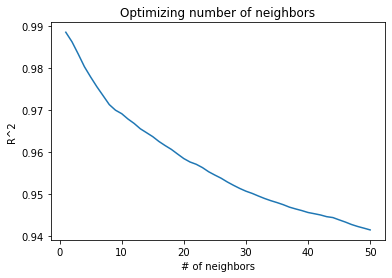

In [36]:
# optimize n_neighbors
k_max = 50
scores_test = []

for k in range(1, k_max+1):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    scores_test.append(model.score(X_test, y_test))
    
plt.plot(range(1, k_max+1), scores_test)
plt.title('Optimizing number of neighbors')
plt.xlabel('# of neighbors')
plt.ylabel('R^2')
plt.show()

Surprisingly, the model performs best with only 1 neighbor.

In [37]:
# train the model
model = KNeighborsRegressor(n_neighbors=1)
model.fit(X_train, y_train)

# print the score on test and train sets
print('{}'.format(model.__class__.__name__))
print('Train R^2: {:.4f}'.format(model.score(X_train, y_train)))
print('Test R^2: {:.4f}'.format(model.score(X_test, y_test)))

KNeighborsRegressor
Train R^2: 1.0000
Test R^2: 0.9885


## Conclusions 2

***

Finally other the 3 models tested, the best is the Multi Layer Perceptron.   
With optimized parameters, we obtain a **R^2 of 0.9980** on the test set.  
Though with MLP, interpretation of the weights of features is more complicated than with a Linear Regression.